# Feature Selection Experiments
Alex Pine
## TODO: Chi Squared

## TODO: Minimum counts 

## TODO: Lasso


## Chi Squared
http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection
This says chi squared is the only stat test that won't mess up sparse matrices.
You can filter features based on their chi sqaured score with the target.

In [1]:
import sys
sys.path.append('../scripts')
from extract_metadata import extract_metadata, label_feature_split
import join_data

In [2]:
CASE_DATA_FILE = '/Users/pinesol/mlcs_data/merged_caselevel_data.csv'
cases_df = extract_metadata(CASE_DATA_FILE)

In [38]:
# NOTE: This gets a smaller version of the dataset, with no features weeded out for not having enough support.

FEATURE_DATA_FILE = '/tmp/chi2_feature_matrix.svmlight'
CASE_IDS_FILE = '/tmp/chi2_case_ids.p'
DOCVEC_SHARDS = '/Users/pinesol/mlcs_data/docvec_text'
NUM_OPINION_SHARDS = 100
min_required_count = 1
X, ordered_case_ids, y = join_data.load_data(FEATURE_DATA_FILE, CASE_IDS_FILE, cases_df, DOCVEC_SHARDS, 
                                             num_opinion_shards=NUM_OPINION_SHARDS)

Constructing data from scratch...
shape:  (1403, 2389)
number of cases 1403
total time: 86.550992012


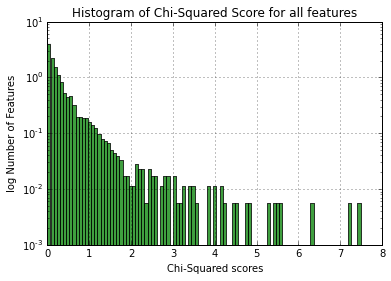

In [39]:
%matplotlib inline

import sklearn.feature_selection

import numpy as np
import matplotlib.pyplot as plt

ch2, p_values = sklearn.feature_selection.chi2(X, y)
plt.hist(ch2, 100, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Chi-Squared scores')
plt.ylabel('log Number of Features')
plt.title('Histogram of Chi-Squared Score for all features')
plt.grid(True)
plt.yscale('log')
plt.show()

But what about p-values? Not all of these scores are significant.

You can filter based on these scores. chi-squared kbest and top percentile require an aribitrary parameters. For example, why do we want the top 10%, and not the top 20%? 
False Positive Rate and False Negative rate also require aribtrary parameters, but they're based on the p-values

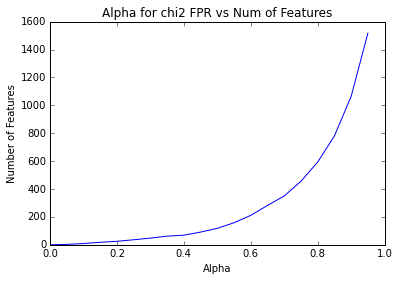

In [45]:

alphas = [0.05*i for i in range(0, 20)]
num_features_per_alpha = []

for alpha in alphas:
    X_new = sklearn.feature_selection.SelectFpr(sklearn.feature_selection.chi2, alpha=alpha).fit_transform(X, y)
    num_features = X_new.shape[1]
    num_features_per_alpha.append(num_features)

plt.plot(alphas, num_features_per_alpha)
plt.xlabel('Alpha')
plt.ylabel('Number of Features')
plt.title('Alpha for chi2 FPR vs Num of Features')
plt.show()